In [1]:
%pylab inline

import cv2
from matplotlib import pyplot as plt

fileName = 'train.png'

Populating the interactive namespace from numpy and matplotlib


## BASIC

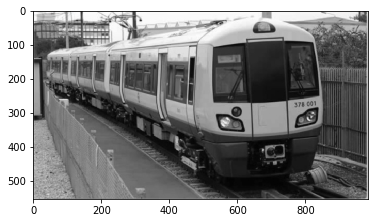

In [2]:
img = cv2.imread(fileName)
plt.imshow(img)

error: /Users/travis/miniconda3/conda-bld/opencv_1489542914304/work/opencv-3.1.0/modules/imgproc/src/color.cpp:7341: error: (-215) scn == 3 || scn == 4 in function ipp_cvtColor


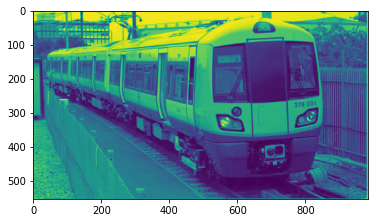

In [5]:
gray_img = cv2.imread(fileName, cv2.IMREAD_GRAYSCALE)
plt.imshow(gray_img)

plt.imshow(cv2.cvtColor(gray_img,cv2.COLOR_BGR2RGB))

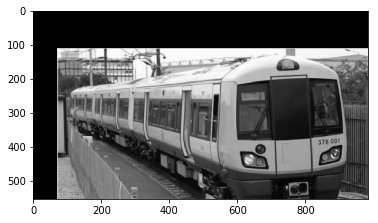

In [14]:
img = cv2.imread(fileName)
num_rows, num_cols = img.shape[:2]

translation_matrix = np.float32([ [1,0,70], [0,1,110] ])
img_translation = cv2.warpAffine(img, translation_matrix, (num_cols, num_rows))
plt.imshow(img_translation)

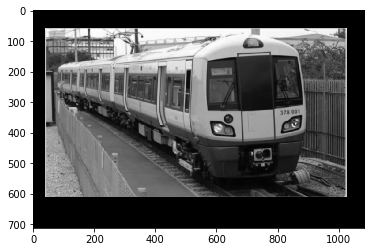

In [15]:
img = cv2.imread(fileName)
num_rows, num_cols = img.shape[:2]

translation_matrix = np.float32([ [1,0,70], [0,1,110] ])
img_translation = cv2.warpAffine(img, translation_matrix, (num_cols + 70, num_rows + 110))
translation_matrix = np.float32([ [1,0,-30], [0,1,-50] ])
img_translation = cv2.warpAffine(img_translation, translation_matrix, (num_cols + 70 + 30, num_rows + 110 + 50))

plt.imshow(img_translation)

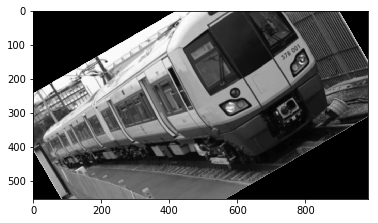

In [16]:
img = cv2.imread(fileName)
num_rows, num_cols = img.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
img_rotation = cv2.warpAffine(img, rotation_matrix, (num_cols, num_rows))
plt.imshow(img_rotation)

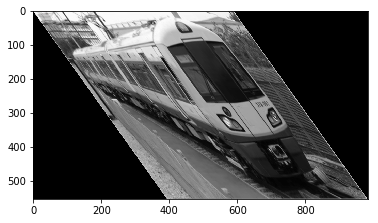

In [17]:
img = cv2.imread(fileName)
rows, cols = img.shape[:2]

src_points = np.float32([[0,0], [cols-1,0], [0,rows-1]])
dst_points = np.float32([[0,0], [int(0.6*(cols-1)),0], [int(0.4*(cols-1)),rows-1]])
affine_matrix = cv2.getAffineTransform(src_points, dst_points)
img_output = cv2.warpAffine(img, affine_matrix, (cols,rows))

plt.imshow(img)
plt.imshow(img_output)


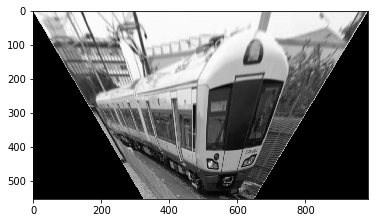

In [18]:
img = cv2.imread(fileName)
rows, cols = img.shape[:2]

src_points = np.float32([[0,0], [cols-1,0], [0,rows-1], [cols-1,rows-1]])
dst_points = np.float32([[0,0], [cols-1,0], [int(0.33*cols),rows-1], [int(0.66*cols),rows-1]]) 
projective_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
img_output = cv2.warpPerspective(img, projective_matrix, (cols,rows))

#cv2.imshow('Input', img)
#cv2.imshow('Output', img_output)

plt.imshow(img_output)

In [50]:
img = cv2.imread(fileName, cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape

#####################
# Vertical wave

img_output = np.zeros(img.shape, dtype=img.dtype)

for i in range(rows):
    for j in range(cols):
        offset_x = int(25.0 * math.sin(2 * 3.14 * i / 180))
        offset_y = 0
        if j+offset_x < rows:
            img_output[i,j] = img[i,(j+offset_x)%cols]
        else:
            img_output[i,j] = 0

cv2.imshow('Input', img)
cv2.imshow('Vertical wave', img_output)

#####################
# Horizontal wave

img_output = np.zeros(img.shape, dtype=img.dtype)

for i in range(rows):
    for j in range(cols):
        offset_x = 0
        offset_y = int(16.0 * math.sin(2 * 3.14 * j / 150))
        if i+offset_y < rows:
            img_output[i,j] = img[(i+offset_y)%rows,j]
        else:
            img_output[i,j] = 0

cv2.imshow('Horizontal wave', img_output)

#####################
# Both horizontal and vertical 

img_output = np.zeros(img.shape, dtype=img.dtype)

for i in range(rows):
    for j in range(cols):
        offset_x = int(20.0 * math.sin(2 * 3.14 * i / 150))
        offset_y = int(20.0 * math.cos(2 * 3.14 * j / 150))
        if i+offset_y < rows and j+offset_x < cols:
            img_output[i,j] = img[(i+offset_y)%rows,(j+offset_x)%cols]
        else:
            img_output[i,j] = 0

cv2.imshow('Multidirectional wave', img_output)

#####################
# Concave effect

img_output = np.zeros(img.shape, dtype=img.dtype)

for i in range(rows):
    for j in range(cols):
        offset_x = int(128.0 * math.sin(2 * 3.14 * i / (2*cols)))
        offset_y = 0
        if j+offset_x < cols:
            img_output[i,j] = img[i,(j+offset_x)%cols]
        else:
            img_output[i,j] = 0

cv2.imshow('Concave', img_output)
cv2.waitKey()

113

## Detecting Edges and Applying Image Filters

In [51]:
# Blurring

img = cv2.imread(fileName)
rows, cols = img.shape[:2]

kernel_identity = np.array([[0,0,0], [0,1,0], [0,0,0]])
kernel_3x3 = np.ones((3,3), np.float32) / 9.0
kernel_5x5 = np.ones((5,5), np.float32) / 25.0

cv2.imshow('Original', img)

output = cv2.filter2D(img, -1, kernel_identity)
cv2.imshow('Identity filter', output)

output = cv2.filter2D(img, -1, kernel_3x3)
cv2.imshow('3x3 filter', output)

output = cv2.filter2D(img, -1, kernel_5x5)
cv2.imshow('5x5 filter', output)

cv2.waitKey(0)

113

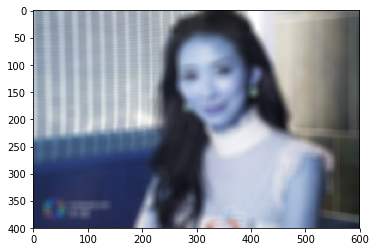

In [5]:
img = cv2.imread(fileName)
output = cv2.blur(img, (15,15))

plt.imshow(output)

In [20]:
img = cv2.imread(fileName, cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape

sobel_horizontal = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobel_vertical = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)

#cv2.imshow('Original', img)
#cv2.imshow('Sobel horizontal', sobel_horizontal)
#cv2.imshow('Sobel vertical', sobel_vertical)

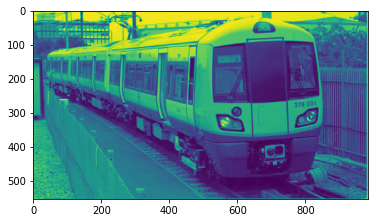

In [21]:
plt.imshow(img)

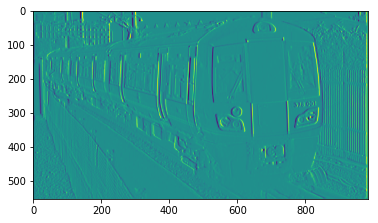

In [22]:
plt.imshow(sobel_horizontal)

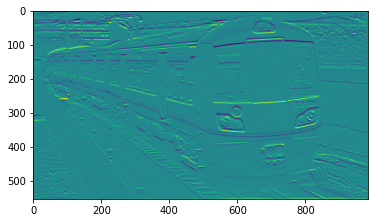

In [23]:
plt.imshow(sobel_vertical)

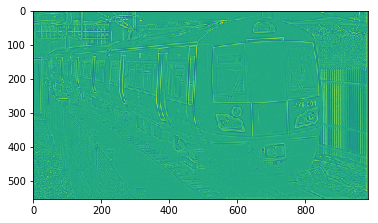

In [24]:
img = cv2.imread(fileName, cv2.IMREAD_GRAYSCALE)
laplacian = cv2.Laplacian(img, cv2.CV_64F)

plt.imshow(laplacian)

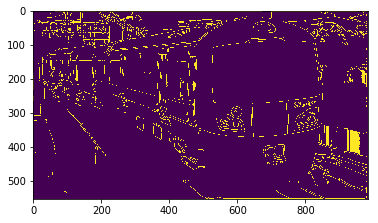

In [26]:
img = cv2.imread(fileName)
canny = cv2.Canny(img, 50, 240)
plt.imshow(canny)

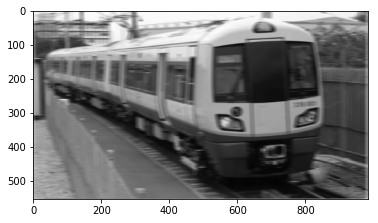

In [27]:
img = cv2.imread(fileName)
#cv2.imshow('Original', img)

size = 15

# generating the kernel
kernel_motion_blur = np.zeros((size, size))
kernel_motion_blur[int((size-1)/2), :] = np.ones(size)
kernel_motion_blur = kernel_motion_blur / size

# applying the kernel to the input image
output = cv2.filter2D(img, -1, kernel_motion_blur)

#cv2.imshow('Motion Blur', output)
plt.imshow(output)

# sharpen

In [29]:
img = cv2.imread(fileName)
#cv2.imshow('Original', img)

# generating the kernels
kernel_sharpen_1 = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
kernel_sharpen_2 = np.array([[1,1,1], [1,-7,1], [1,1,1]])
kernel_sharpen_3 = np.array([[-1,-1,-1,-1,-1],
                             [-1,2,2,2,-1],
                             [-1,2,8,2,-1],
                             [-1,2,2,2,-1],
                             [-1,-1,-1,-1,-1]]) / 8.0

# applying different kernels to the input image
output_1 = cv2.filter2D(img, -1, kernel_sharpen_1)
output_2 = cv2.filter2D(img, -1, kernel_sharpen_2)
output_3 = cv2.filter2D(img, -1, kernel_sharpen_3)

#cv2.imshow('Sharpening', output_1)
#cv2.imshow('Excessive Sharpening', output_2)
#cv2.imshow('Edge Enhancement', output_3)

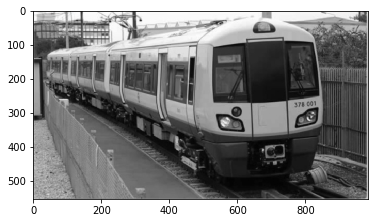

In [33]:
plt.imshow(img)

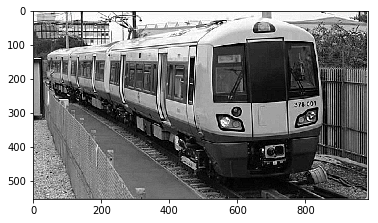

In [30]:
plt.imshow(output_1)

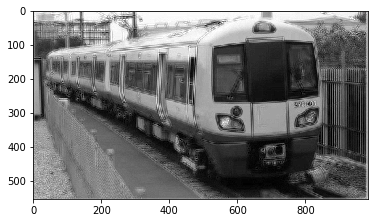

In [31]:
plt.imshow(output_2)

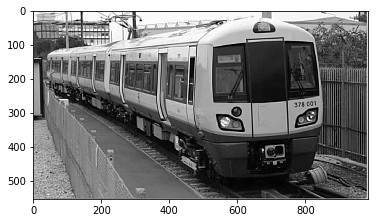

In [32]:
plt.imshow(output_3)

## Embossing

In [35]:
img_emboss_input = cv2.imread(fileName)

# generating the kernels
kernel_emboss_1 = np.array([[0,-1,-1],
                            [1,0,-1],
                            [1,1,0]])
kernel_emboss_2 = np.array([[-1,-1,0],
                            [-1,0,1],
                            [0,1,1]])
kernel_emboss_3 = np.array([[1,0,0],
                            [0,0,0],
                            [0,0,-1]])

# converting the image to grayscale
gray_img = cv2.cvtColor(img_emboss_input,cv2.COLOR_BGR2GRAY)

# applying the kernels to the grayscale image and adding the offset
output_1 = cv2.filter2D(gray_img, -1, kernel_emboss_1) + 128
output_2 = cv2.filter2D(gray_img, -1, kernel_emboss_2) + 128
output_3 = cv2.filter2D(gray_img, -1, kernel_emboss_3) + 128

#cv2.imshow('Input', img_emboss_input)
#cv2.imshow('Embossing - South West', output_1)
#cv2.imshow('Embossing - South East', output_2)
#cv2.imshow('Embossing - North West', output_3)

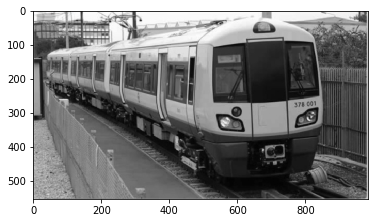

In [36]:
plt.imshow(img_emboss_input)

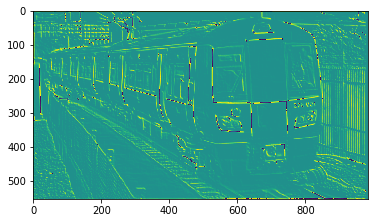

In [37]:
plt.imshow(output_1)

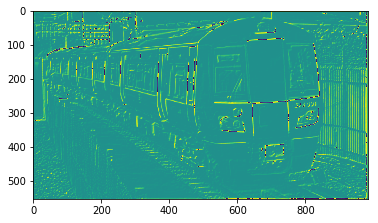

In [38]:
plt.imshow(output_2)

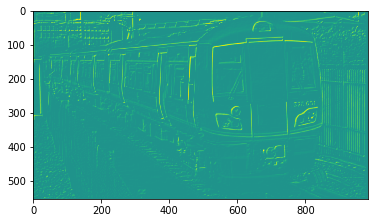

In [39]:
plt.imshow(output_3)

## Erosion and dilation

In [2]:
img = cv2.imread('words.png', 0)

kernel = np.ones((5,5), np.uint8)

img_erosion = cv2.erode(img, kernel, iterations=1)
img_dilation = cv2.dilate(img, kernel, iterations=1)

#cv2.imshow('Input', img)
#cv2.imshow('Erosion', img_erosion)
#cv2.imshow('Dilation', img_dilation)

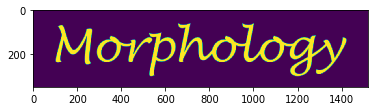

In [3]:
plt.imshow(img)

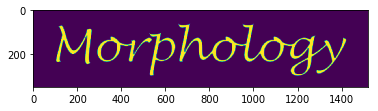

In [4]:
plt.imshow(img_erosion)

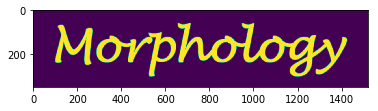

In [5]:
plt.imshow(img_dilation)

## Creating a vignette filter

In [9]:
img = cv2.imread('flower.png')
rows, cols = img.shape[:2]

# generating vignette mask using Gaussian kernels
kernel_x = cv2.getGaussianKernel(cols,200)
kernel_y = cv2.getGaussianKernel(rows,200)
kernel = kernel_y * kernel_x.T
mask = 255 * kernel / np.linalg.norm(kernel)
output = np.copy(img)

# applying the mask to each channel in the input image
for i in range(3):
    output[:,:,i] = output[:,:,i] * mask

#cv2.imshow('Original', img)
#cv2.imshow('Vignette', output)
#cv2.waitKey(0)

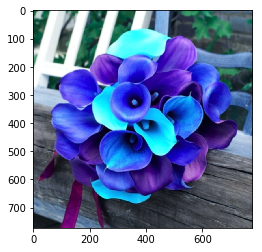

In [10]:
plt.imshow(img)

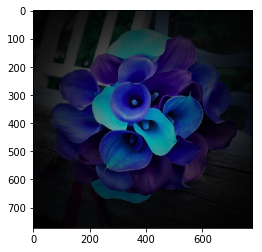

In [11]:
plt.imshow(output)

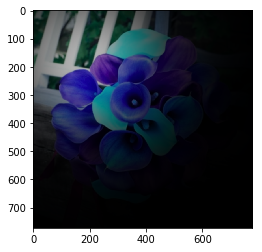

In [12]:
img = cv2.imread('flower.png')
rows, cols = img.shape[:2]

# generating vignette mask using Gaussian kernels
kernel_x = cv2.getGaussianKernel(int(1.5*cols),200)
kernel_y = cv2.getGaussianKernel(int(1.5*rows),200)
kernel = kernel_y * kernel_x.T
mask = 255 * kernel / np.linalg.norm(kernel)
mask = mask[int(0.5*rows):, int(0.5*cols):]
output = np.copy(img)

# applying the mask to each channel in the input image
for i in range(3):
    output[:,:,i] = output[:,:,i] * mask

#cv2.imshow('Input', img)
#cv2.imshow('Vignette with shifted focus', output)
plt.imshow(output)

# Enhancing the contrast in an image

In [19]:
img = cv2.imread('landscape01.png', 0)

# equalize the histogram of the input image
histeq = cv2.equalizeHist(img)

#cv2.imshow('Input', img)
#cv2.imshow('Histogram equalized', histeq)
#cv2.waitKey(0)

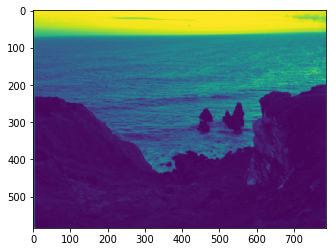

In [20]:
plt.imshow(img)

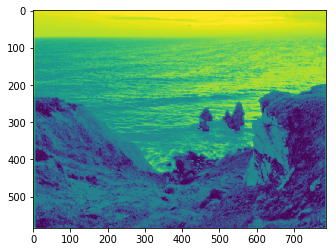

In [21]:
plt.imshow(histeq)

In [22]:
img = cv2.imread('landscape02.png')

img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

#cv2.imshow('Color input image', img)
#cv2.imshow('Histogram equalized', img_output)
#cv2.waitKey(0)

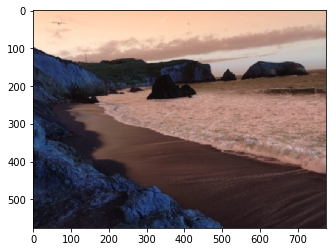

In [23]:
plt.imshow(img)

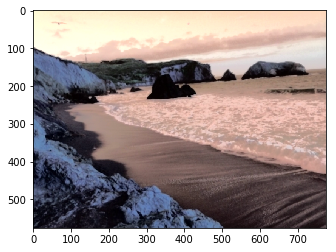

In [24]:
plt.imshow(img_output)

## Cartoonizing an Image

In [1]:
import cv2

cap = cv2.VideoCapture(0)

# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
    cv2.imshow('Input', frame)

    c = cv2.waitKey(1)
    if c == 27:
        break

cap.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 

In [2]:
ret, frame = cap.read()

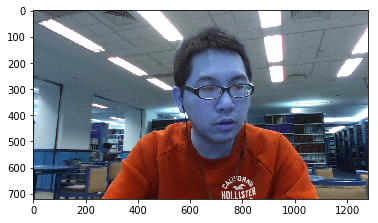

In [5]:
plt.imshow(frame)

In [8]:
import cv2
import numpy as np

img = cv2.imread('detect.png')
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

surf = cv2.

# This threshold controls the number of keypoints
surf.hessianThreshold = 15000

kp, des = surf.detectAndCompute(gray, None)

cv2.drawChessboardCorners

#img = cv2.drawKeypoints(img, kp, None, (0,255,0), 4)

#cv2.imshow('SURF features', img)
#cv2.waitKey()

SyntaxError: invalid syntax (<ipython-input-8-0781e4aab51d>, line 7)